In [9]:
from runtest import *
from Data_binary import *

In [10]:
env = Data(unknown_rate=1)
env.loadfile("hcv.csv")
env.normalize()
env.alpha = 0
env.cluster_K_means(7)
# this makes it so when we do the ranking, we only check against this number
# of data points
#env.set_validation(2000)
# makes the costs uniform; we won't have groups either
env.set_costs()

# partition into training/test sets
test_env = env.split(0.80)
print("training points:", len(env.data))
print("test points:", len(test_env.data))

training points: 493
test points: 122


In [22]:
costs = [(i+1)/13 for i in range(13)] # list of maximum budgets
results = [] # stores all the results for each value of budget
for c in costs:
    env.max_cost = c
    test_env.max_cost = c
    print("At cost:", c)
    results.append(runtest(env,test_env))

At cost: 0.07692307692307693
At cost: 0.15384615384615385
At cost: 0.23076923076923078
At cost: 0.3076923076923077
At cost: 0.38461538461538464
At cost: 0.46153846153846156
At cost: 0.5384615384615384
At cost: 0.6153846153846154
At cost: 0.6923076923076923
At cost: 0.7692307692307693
At cost: 0.8461538461538461
At cost: 0.9230769230769231
At cost: 1.0


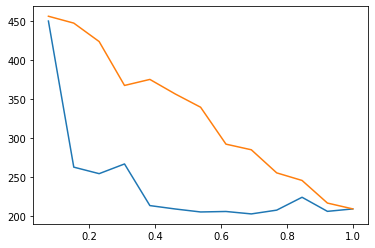

In [23]:
import matplotlib.pyplot as plt

# this value is the total distance between p and 5 closest predicted points to p
resRL = [results[i][0] for i in range(len(results))]
resRAND = [results[i][1] for i in range(len(results))]
plt.plot(costs, resRL, costs, resRAND)
plt.show()

In [24]:
print(resRAND)

[456.2105626517485, 447.3937325558502, 423.7289678518197, 367.3876781354123, 375.13554733787436, 356.472949699833, 339.43106632622636, 292.0660794856351, 284.83714104734986, 255.2131050822163, 245.47028668744733, 216.46131172626002, 208.95419087949193]
